# DASK Tests
Dask: http://dask.pydata.org/en/latest/

Dask.distributed https://distributed.readthedocs.io/en/latest/





In [1]:
import dask
import pandas as pd
import distributed
import bokeh
import tornado
import numpy as np

## Versions

In [2]:
print('dask', dask.__version__)
print('distributed', distributed.__version__)
print('bokeh', bokeh.__version__ )
print('tornado', tornado.version)
print('numpy', np.__version__)

dask 2.14.0
distributed 2.14.0
bokeh 2.0.1
tornado 6.0.4
numpy 1.18.2


## Set up distributed workers

In [3]:
client = distributed.Client("tcp://10.6.43.39:8786")
client

Client Scheduler: tcp://127.0.0.1:39121 Dashboard: /proxy/8787/status,Cluster Workers: 8 Cores: 48 Memory: 202.49 GB


## Example

In [4]:
import dask.array as da
import dask.dot

In [5]:
A = da.random.random(100, chunks=(25,))
A

dask.array<random_sample, shape=(100,), dtype=float64, chunksize=(25,), chunktype=numpy.ndarray>

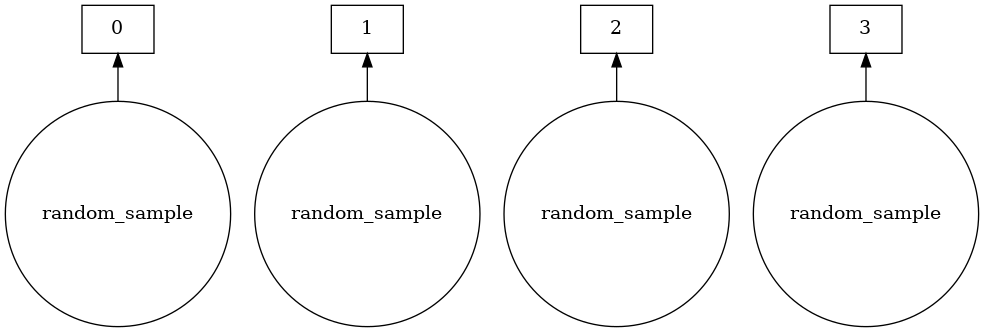

In [6]:
dask.dot.dot_graph(A.dask)

In [7]:
M = A.mean()
M

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>

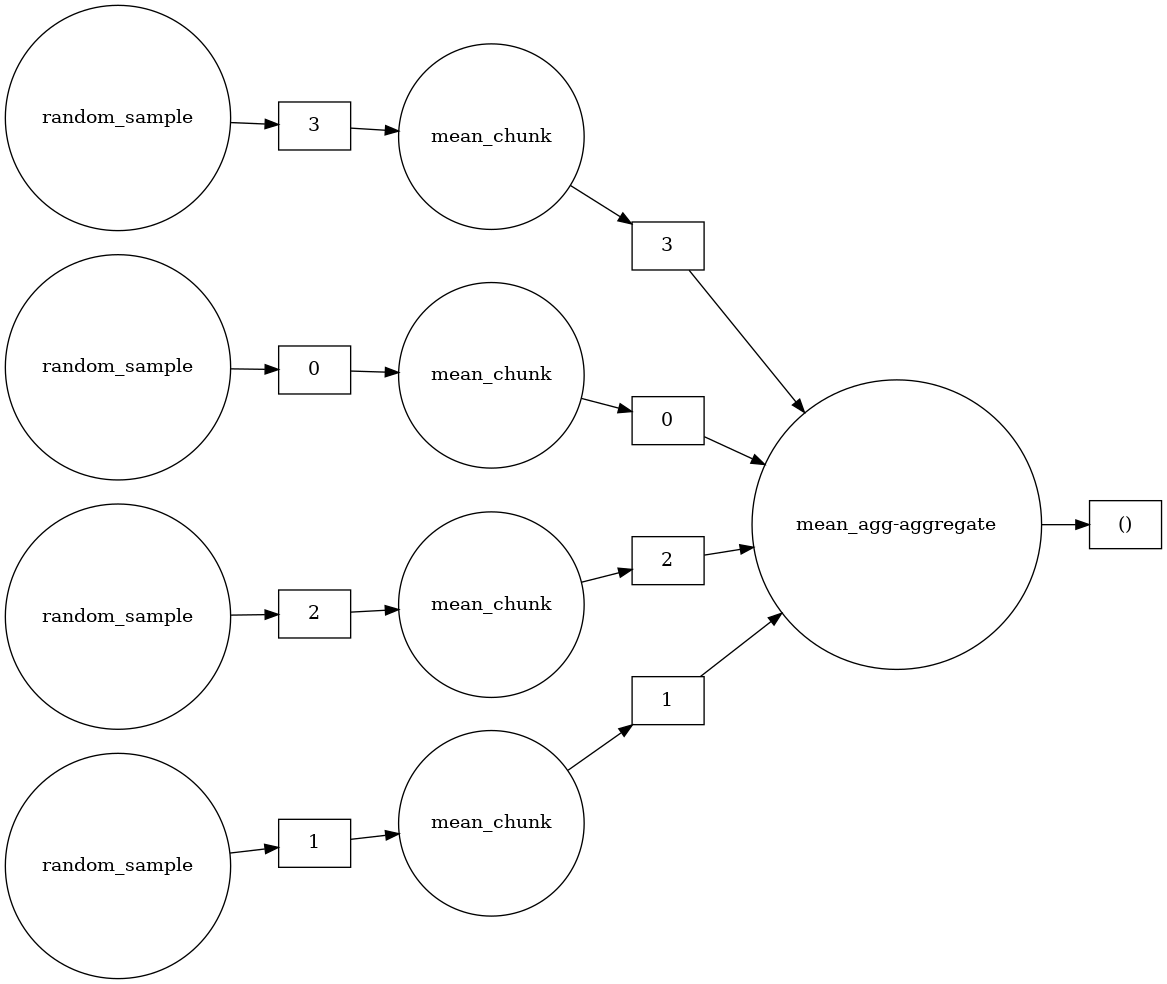

In [8]:
dask.dot.dot_graph(M.dask, rankdir='LR')

In [9]:
M.compute()

0.5469672240675085

In [10]:
from distributed.diagnostics import progressbar

In [11]:
A = da.random.random(100000, chunks=(25,))
M = A.mean()

In [12]:
f = client.compute(M)

In [13]:
progressbar.progress(f, multi=False)

In [14]:
f = client.compute(M)
f

<Future: pending, key: finalize-673fb76a6b30284ece9f8a68dcacafbb>

In [15]:
progressbar.progress(f)

VBox()